Trying to use Plotly Dash

In [ ]:
from dash import Dash, dcc, html, Input, Output
import plotly.graph_objects as go

app = Dash(__name__)


app.layout = html.Div([
    html.H4('Interactive color selection with simple Dash example'),
    html.P("Select color:"),
    dcc.Dropdown(
        id="dropdown",
        options=['Gold', 'MediumTurquoise', 'LightGreen'],
        value='Gold',
        clearable=False,
    ),
    dcc.Graph(id="graph"),
])


@app.callback(
    Output("graph", "figure"), 
    Input("dropdown", "value"))
def display_color(color):
    fig = go.Figure(
        data=go.Bar(y=[2, 3, 1], # replace with your own data source
                    marker_color=color))
    return fig


app.run_server(debug=True)


In [ ]:
from dash import Dash, html, dcc, callback, Output, Input
import plotly.express as px
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/gapminder_unfiltered.csv')

app = Dash(__name__)

app.layout = html.Div([
    html.H1(children='Title of Dash App', style={'textAlign':'center'}),
    dcc.Dropdown(df.country.unique(), 'Canada', id='dropdown-selection'),
    dcc.Graph(id='graph-content')
])

@callback(
    Output('graph-content', 'figure'),
    Input('dropdown-selection', 'value')
)
def update_graph(value):
    dff = df[df.country==value]
    return px.line(dff, x='year', y='pop')

if __name__ == '__main__':
    app.run(debug=True)

In [1]:
import plotly.express as px
fig = px.bar(x=["a", "b", "c"], y=[1, 3, 2])
fig.write_html('first_figure.html', auto_open=True)

### Columns:
AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Reviews,Header image,Website,Support url,Support email,Windows,Mac,Linux,Metacritic score,Metacritic url,User score,Positive,Negative,Score rank,Achievements,Recommendations,Notes,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies

### Price Sensitivity Analysis:
- Conduct price sensitivity analysis for each genre to determine the price elasticity of demand.
- Visualize demand or price-response curves to identify optimal pricing strategies for maximizing revenue.

In [112]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd

# Load the dataset
# Assuming the dataset is stored in a CSV file named 'games_data.csv'
df = pd.read_csv('data/games.csv')

# Preprocess the data: Calculate average value for 'Estimated owners' range
df['Estimated owners'] = df['Estimated owners'].str.replace('[^\d-]+', '', regex=True)
df[['Min Owners', 'Max Owners']] = df['Estimated owners'].str.split('-', expand=True).astype(float)
df['Average Owners'] = (df['Min Owners'] + df['Max Owners']) / 2

# Filter out games priced below $30
# df = df[df['Price'] <= 30]

# Calculate number of rows before explosion
rows_before = len(df)

# Duplicate rows for each genre
genre_list = df['Genres'].str.split(',', expand=True).stack().unique()
df = df.assign(Genre=df['Genres'].str.split(','), observed=True).explode('Genre')

# Calculate number of rows after explosion
rows_after = len(df)

# Calculate the difference in rows
rows_difference = rows_after - rows_before

# Print the comparison
print(f"Number of rows before explosion: {rows_before}")
print(f"Number of rows after explosion: {rows_after}")
print(f"Difference in rows: {rows_after/rows_before:.2f} times")

# Define the Dash app
app = dash.Dash(__name__)

# Define the layout of the Dash app
app.layout = html.Div([
    dcc.Dropdown(
        id='genre-dropdown',
        options=[{'label': genre, 'value': genre} for genre in genre_list],
        value=genre_list[0],  # Default value
        clearable=False
    ),
    dcc.Graph(id='demand-histogram')
])

# Define callback to update the demand histogram based on selected genre
@app.callback(
    Output('demand-histogram', 'figure'),
    [Input('genre-dropdown', 'value')]
)
def update_demand_histogram(genre):
    genre_data = df[df['Genre'] == genre]
    # Perform analysis and visualization here
    # Example: Plot histogram of average owners for each price range
    
    # Replace the following code with your analysis and visualization
    fig = px.histogram(genre_data, x='Price', y='Average Owners', nbins=30, 
                       title=f'Average Owners Distribution for {genre}', 
                       labels={'Price': 'Price Range', 'Average Owners': 'Average Owners'},
                       histfunc='avg')
    return fig

# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True)

Number of rows before explosion: 85103
Number of rows after explosion: 236687
Difference in rows: 2.78 times


<Axes: >

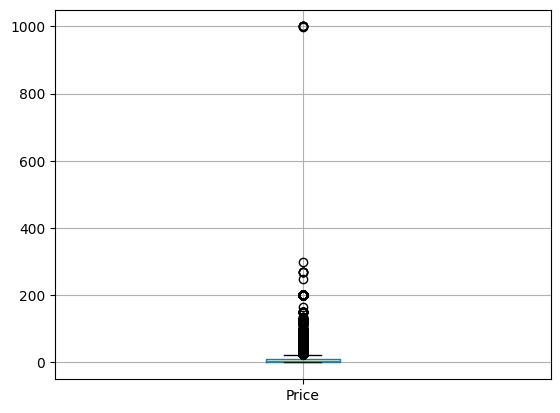

In [111]:
from matplotlib import pyplot as plt
df.boxplot(column=['Price'])